In [1]:
import os
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../src')
sys.path.append('../../src')
from Library import VerboseLibrary
from ActivityClassifier import PatientTrendAwareThresholder
import matplotlib.colors as mcolors

named_colors = list(mcolors.TABLEAU_COLORS)

device = 'cpu'#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Models

In [2]:
model_names = sorted(os.listdir('./models_no_thresholding'))
len(model_names)

10

In [3]:
model_coefficient_history = {}
model_coefficient_mask = {}
model_coefficients = {}

for name in tqdm(model_names):
    model = torch.load(os.path.join('.', 'models_no_thresholding', name)).to(device)
    model_coefficient_history[name] = np.array(model.coefficient_history)
    model_coefficients[name] = np.array(model.coefficient_mask.detach().cpu().numpy() * model.coefficients.detach().cpu().numpy())
    model_coefficient_mask[name] = np.array(model.coefficient_mask)

100%|██████████| 10/10 [00:02<00:00,  3.67it/s]


# Coefficients

In [4]:
masked_coefficient_list = np.array([model_coefficients[name].round(2) for name in model_names], dtype=object)

In [5]:
masked_coefficient_list[masked_coefficient_list == 0] = '-'

In [ ]:
pd.DataFrame(masked_coefficient_list[:, :, 0], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1    z_1    z_2   z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3 z_3*z_3  \
0 -0.23  -1.54   0.75 -0.61   -0.01    0.36    0.05   -0.37    9.17   -0.11   
1  0.04  -8.96 -11.42 -0.38    0.03    0.09   -0.25    0.04    -0.2    0.01   
2 -7.31  -2.39   0.11 -0.34   -0.04    0.09    -0.1    0.17   -3.71    0.07   
3 -1.01  10.05   0.42  1.29    0.07   -0.64   -1.18    -0.1   -0.08    0.53   
4  -2.1  -13.7  -0.95 -1.87    0.44    0.82   -2.76   -1.36    2.75    0.88   
5  1.76 -13.69  -0.52 -1.24   -0.29   -0.67    2.56    1.32   -2.67   -0.95   
6  6.93  -2.65   0.09 -0.08    0.12    0.03   -0.04   -0.22   -3.72   -0.12   
7 -0.36  -1.13  -0.09  0.35   -0.01   -0.27   -0.04   -0.26    8.85     0.1   
8  0.34  -0.87   2.04  2.08    0.02   -0.46    0.51    2.21    0.16   -2.15   
9  1.78  -1.18   6.46  1.47   -0.07   -1.95    0.85     0.1     2.9   -0.47   

  z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3 z_1*z_3*z_3  \
0       -0.01        0.01       -0.05       -0.02        0.04        0.01   
1       -0.02        0.11        0.03       -0.01        0.01           -   
2       -0.03        0.03           -        0.01       -0.05       -0.01   
3       -0.08        0.07       -0.04       -0.34       -0.18        0.03   
4        0.02       -0.02           -       -0.04       -0.05        0.06   
5        0.01       -0.04        0.04       -0.01       -0.03        0.03   
6       -0.03        0.01           -        0.03        0.15           -   
7       -0.01           -        0.09       -0.04       -0.03       -0.03   
8           -        0.03        0.06        0.01       -0.11        0.01   
9       -0.03       -0.06        0.02       -0.04        0.17       -0.09   

  z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0        0.03       -0.09        0.03       -0.01  
1        0.01           -        0.02       -0.01  
2           -        0.01       -0.04        0.01  
3        0.04        -0.5        0.04        0.16  
4        0.06         0.1       -0.04        0.01  
5        0.06        0.04       -0.04           -  
6        0.01        0.02       -0.01           -  
7       -0.01        0.25           -        0.01  
8       -0.23        0.41        0.47       -0.18  
9       -0.01        0.02       -0.12        0.03

In [8]:
pd.DataFrame(masked_coefficient_list[:, :, 1], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1   z_1   z_2    z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3 z_3*z_3  \
0  6.99 -0.13  -2.6  -0.22   -0.16    0.06   -3.31    0.09       -   -0.24   
1 -0.16  1.24 -1.28  -0.27    0.07   -0.05   -8.73       -    0.24   -0.02   
2  0.49 -0.09 -8.96  -11.9       -     0.2    0.12    0.01    0.06   -0.01   
3 -1.93  0.47 -0.65   2.77   -1.18   -0.03   -0.24    0.39   -0.44    1.21   
4 -1.95  5.41  1.18   5.79   -0.21    0.21   -1.53   -0.35    2.36    0.56   
5  2.09  5.85   1.5   5.71     0.2   -0.14    1.31    0.11    -2.1   -0.56   
6 -0.13 -0.45 -8.86  11.57   -0.09   -0.31    0.13   -0.07    0.16       -   
7 -7.18  0.13 -2.34   0.12    0.13    0.13   -3.39   -0.03    0.01    0.18   
8  1.56  5.09  0.06    0.1   -0.11    2.64    0.04   -0.51    0.08    0.17   
9  -0.1 -0.82 -3.53   0.54    4.08   -0.21    -1.6    0.07   -0.02   -5.15   

  z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3 z_1*z_3*z_3  \
0           -       -0.01           -       -0.01        0.12        0.01   
1        0.01       -0.02       -0.05        0.03       -0.02        0.13   
2           -           -        0.03       -0.03        0.02           -   
3       -0.08        0.14         0.2       -0.06        0.23       -0.02   
4       -0.02       -0.05       -0.02        0.05        0.06         0.1   
5       -0.02       -0.06        0.02        0.04        0.05        0.04   
6        0.01           -       -0.04       -0.02        0.01           -   
7           -        0.01       -0.03        0.01       -0.14        0.02   
8           -           -        0.02       -0.15       -0.19       -0.36   
9        0.01       -0.02       -0.15        0.04        0.03        0.01   

  z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0       -0.03       -0.03        0.01           -  
1       -0.01       -0.01       -0.04        0.01  
2       -0.02         0.1       -0.01        0.01  
3        0.02           -       -0.39       -0.02  
4        0.02       -0.01        -0.1       -0.03  
5        0.01       -0.06        -0.1       -0.03  
6       -0.03       -0.11           -       -0.02  
7       -0.04        0.02        0.02           -  
8        0.02       -0.01       -0.04       -0.03  
9           -        0.01        0.07        0.11

In [9]:
pd.DataFrame(masked_coefficient_list[:, :, 2], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1    z_1   z_2   z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3 z_3*z_3  \
0  -0.39  11.48  0.46 -8.71    0.01    0.15   -0.11    0.08   -0.39   -0.01   
1   7.55   -0.2  0.06 -2.53   -0.16    3.49    0.05   -0.09    0.03    0.07   
2  -0.07   0.22  0.64 -1.41    0.36    8.54   -0.21   -0.17   -0.06    0.03   
3 -13.27  -0.56 -0.13  -5.4   -0.46   -0.52    0.61   -0.28    3.81     3.1   
4   6.11   0.62  -0.4 -0.62    1.53    0.48   -1.04   -3.69   -0.26    0.24   
5  -6.73   0.67 -0.55 -0.88   -1.55   -0.28    0.94    3.54     0.6   -0.23   
6   0.22  -0.05 -0.74 -1.43     0.1    9.24    0.32    0.08       -   -0.01   
7  -0.03 -11.33  0.78 -8.88    0.01    0.19   -0.15   -0.01    0.36   -0.01   
8  -1.55   5.81  0.06  0.13   -0.06    0.06   -2.88   -0.14   -0.07    0.61   
9  10.06   0.74 -6.79 -7.51   -0.17   -1.04    0.52   -0.03    1.43   -0.45   

  z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3 z_1*z_3*z_3  \
0       -0.01           -           -       -0.04        0.03        -0.1   
1           -           -        0.03        0.01       -0.13       -0.01   
2           -        0.17       -0.03       -0.01       -0.08           -   
3       -0.05       -0.08       -0.13        0.08        0.09       -0.03   
4        0.01        0.03        -0.1        0.01       -0.02        0.01   
5        0.01        0.04       -0.05        0.03           -       -0.02   
6        0.01       -0.05       -0.05       -0.05       -0.03           -   
7           -           -       -0.01        0.01       -0.02        0.17   
8       -0.01        0.07        0.02       -0.39       -0.27       -0.23   
9        0.04        0.03       -0.04       -0.03        0.02           -   

  z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0       -0.01       -0.02           -       -0.03  
1           -           -           -       -0.04  
2        0.01       -0.02        0.04       -0.01  
3       -0.06         0.5         0.4        0.15  
4        -0.1       -0.01        0.04           -  
5       -0.15       -0.04        0.07           -  
6           -       -0.02       -0.05       -0.01  
7           -       -0.01       -0.02       -0.02  
8       -0.04       -0.06       -0.04        0.02  
9           -        0.03       -0.06       -0.04

In [7]:
threshold_trial_epochs = np.arange(0, 5001, 500)

In [8]:
def actual_coefficient_survived(name, i, dim):
    return (np.abs(model_coefficient_history[name][threshold_trial_epochs, i, dim]) >= 0.1).all()

def coefficient_survived(name, i, dim, genuine=False):
    if not genuine:
        return np.logical_not(model_classified_history[name][:5001, i, dim]).all()
    else:
        return np.logical_not(model_classified_history[name][:5001, i, dim]).all() and np.abs(model_coefficients[name][i, dim]) >= 0.1

In [9]:
model_order2_detected = {
    name: np.array([
        np.array([actual_coefficient_survived(name, i, j) for i in range(10)]).any()
        and not np.array([actual_coefficient_survived(name, i, j) for i in range(10, 20)]).any()
        for j in range(3)])
    for name in model_names}

In [11]:
for name in model_names:
    print([model_order2_detected[name]])

[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([False, False, False])]
[array([ True,  True,  True])]
[array([ True,  True, False])]
[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([False, False, False])]


### Estimate Trend Tolerance

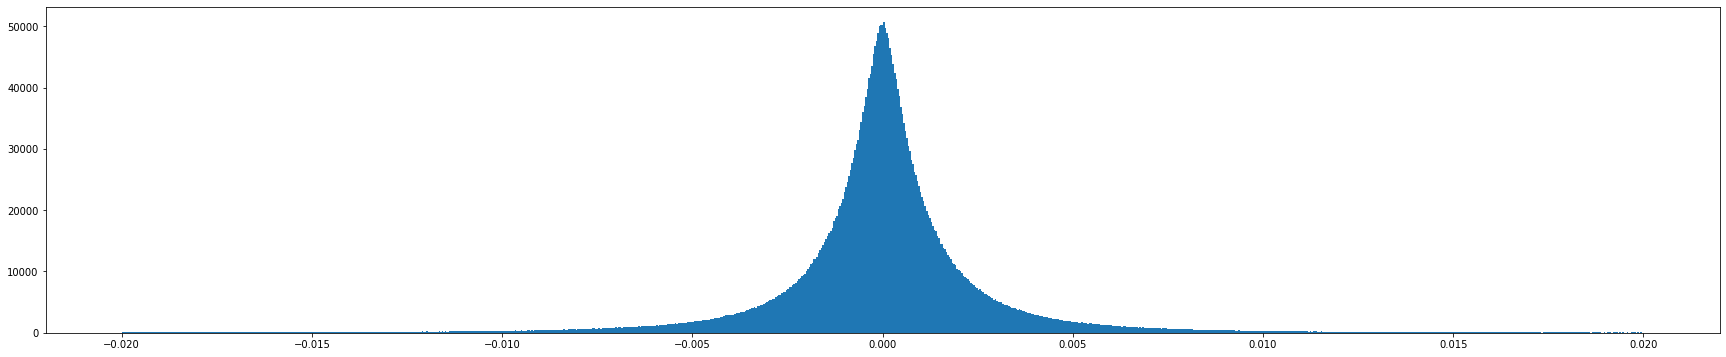

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(30, 6))
ax.hist(np.stack([np.diff(model_coefficient_history[name], axis=0) for name in model_names]).flatten(), bins=np.linspace(-0.02, 0.02, 1000));

In [12]:
trend_std = 2 * np.stack([model_coefficient_history[name] for name in model_names]).flatten().std()
trend_std.round(4)

4.8634

In [13]:
trend_std = 2 * np.stack([np.diff(model_coefficient_history[name], axis=0) for name in model_names]).flatten().std()
trend_std.round(4)

0.0183

In [14]:
cc = PatientTrendAwareThresholder(trend_threshold=0.02)

In [15]:
model_classified_history = {}
model_classified_plus_history = {}

for name in tqdm(model_names):
    model_classified_history[name] = np.stack([cc.classify_converged(model_coefficient_history[name][:i])[0] for i in range(1, len(model_coefficient_history[name]))])

100%|██████████| 10/10 [00:01<00:00,  8.80it/s]


In [16]:
model_ptat_order2_detected = {
    name: np.array([
        np.array([coefficient_survived(name, i, j) for i in range(10)]).any()
        and not np.array([coefficient_survived(name, i, j) for i in range(10, 20)]).any()
        for j in range(3)])
    for name in model_names}

model_genuine_ptat_order2_detected = {
    name: np.array([
        np.array([coefficient_survived(name, i, j, True) for i in range(10)]).any()
        and not np.array([coefficient_survived(name, i, j, True) for i in range(10, 20)]).any()
        for j in range(3)])
    for name in model_names}

In [17]:
# with non-genuine
np.sum([model_ptat_order2_detected[name] for name in model_names])

22

In [18]:
# without non-genuine
np.sum([model_genuine_ptat_order2_detected[name] for name in model_names])

22

In [19]:
total_terms_detected = {name: np.sum(np.logical_not(model_classified_history[name][:5001, :, :]).all(axis=0)) for name in model_names}
total_true_terms_detected = {name: np.sum(np.logical_and(np.abs(model_coefficient_history[name][5001, :, :]) >= 0.1, np.logical_not(model_classified_history[name][:5001, :, :]).all(axis=0))) for name in model_names}

In [20]:
np.mean([v for v in total_terms_detected.values()]), np.mean([v for v in total_true_terms_detected.values()])

(12.3, 11.7)

In [21]:
for name in model_names:
    print([model_ptat_order2_detected[name]])

[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([ True,  True,  True])]
[array([False, False, False])]
[array([ True,  True,  True])]
[array([ True,  True, False])]
[array([ True,  True,  True])]
[array([False,  True,  True])]
[array([False, False, False])]


# History

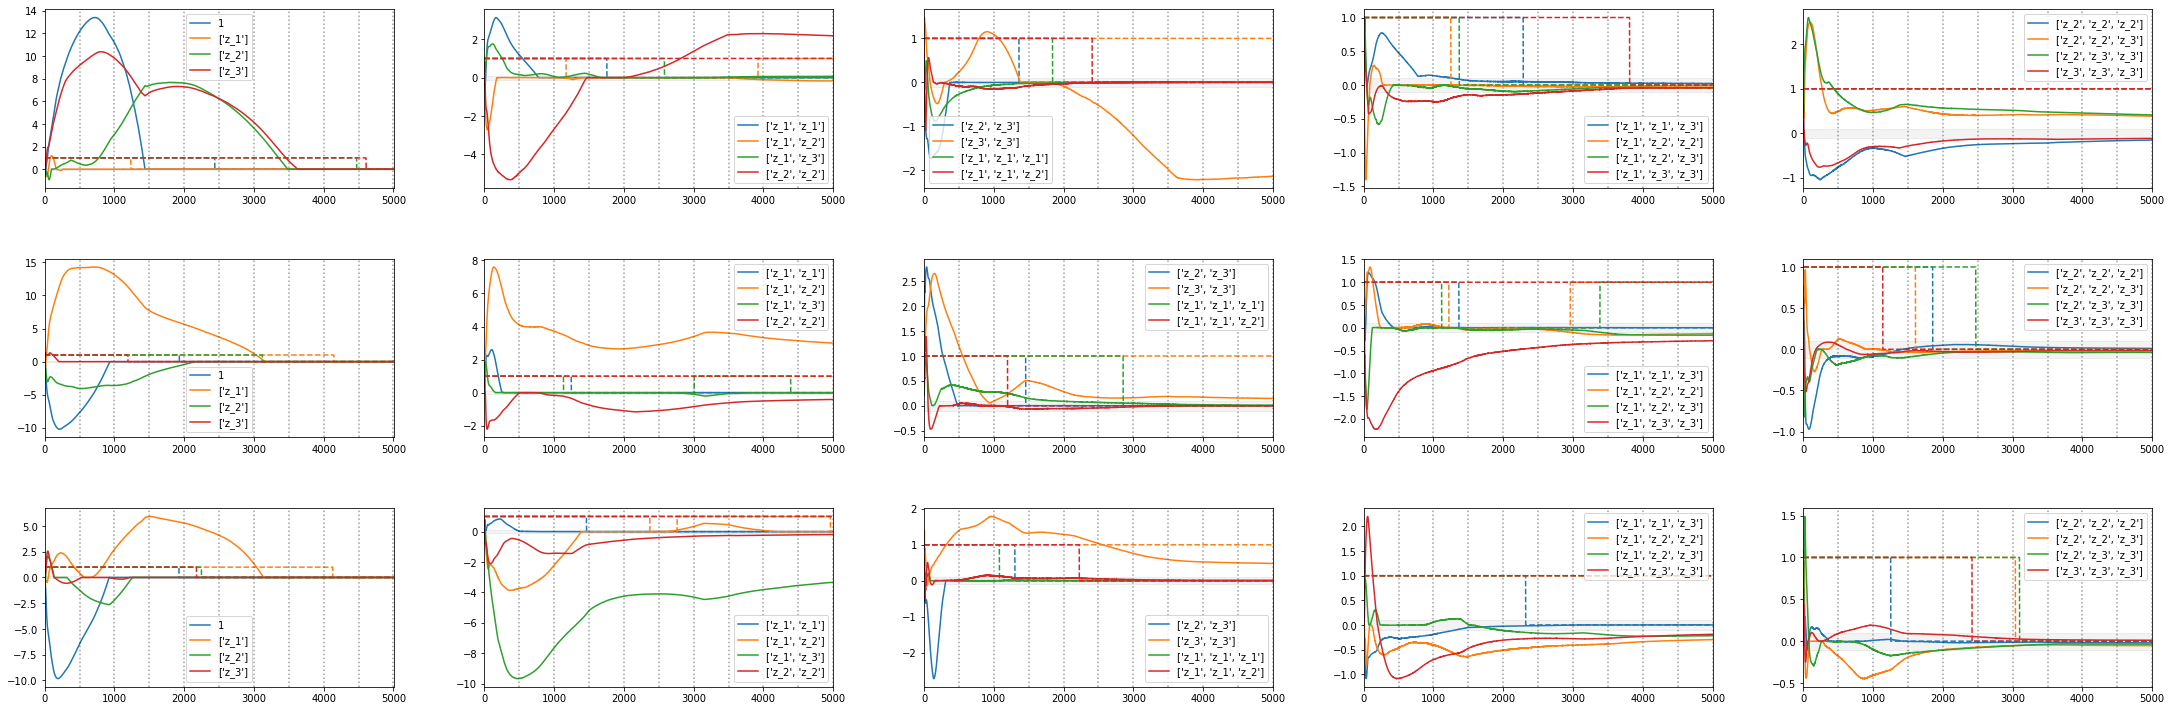

In [22]:
m = model_names[-1]
xlim = 5001
split_size = 4

fig, ax = plt.subplots(3, 5, figsize=(30, 10))
fig.tight_layout(w_pad=6, h_pad=5)

for k in range(3):
    for split in range(5):
        for i, (n, c, r) in enumerate(
            zip(VerboseLibrary(model.library).build_verbose()[split*split_size:(split+1)*split_size],
            model_coefficient_history[m][:, :, k].reshape(6002, 20).T[split*split_size:(split+1)*split_size],
            model_classified_history[m][:, :, k].reshape(6001, 20).T[split*split_size:(split+1)*split_size],
            )):
            ax[k][split].plot(c[:xlim].T, label=n, color=named_colors[i])
            ax[k][split].plot(np.logical_not(r[:xlim].T), color=named_colors[i], linestyle='--')
            ax[k][split].legend(); ax[k][split].axhspan(-0.1, 0.1, color='black', alpha=0.01); ax[k][split].set_xlim(0, xlim);# ax[split].set_ylim(-0.1, 0.1)
            for threshold_epoch in np.arange(500, xlim, 500): ax[k][split].axvline(threshold_epoch, color='black', alpha=0.1, linestyle=':')

# Histories with Thresholding in Epoch 500

100%|██████████| 10/10 [00:00<00:00, 40.36it/s]


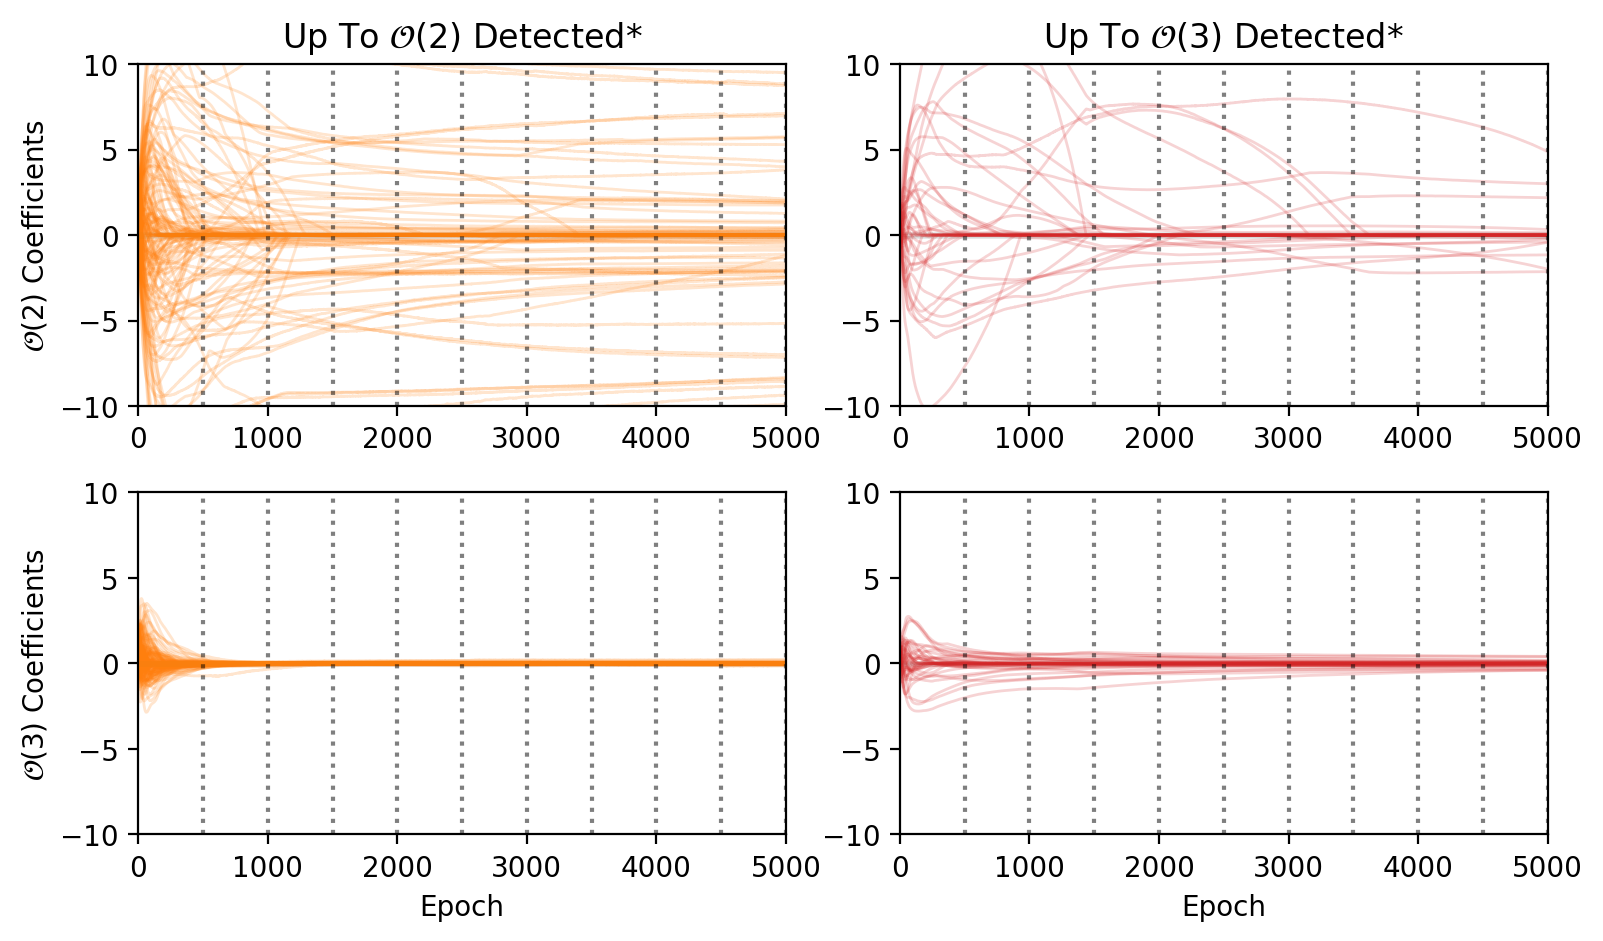

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(21/1.8*2/3, 8/1.8), dpi=200)
fig.tight_layout(w_pad=1, h_pad=1)
xlim = 5001
alpha=0.2

for name in tqdm(model_names):
    for j in range(2):
        if model_order2_detected[name][j]:
            axes[0][0].plot(model_coefficient_history[name][:xlim, :10, j].reshape(xlim, -1), color='tab:orange', alpha=alpha, linewidth=1);
            axes[1][0].plot(model_coefficient_history[name][:xlim, 10:, j].reshape(xlim, -1), color='tab:orange', alpha=alpha, linewidth=1);
        else:
            axes[0][1].plot(model_coefficient_history[name][:xlim, :10, j].reshape(xlim, -1), color='tab:red', alpha=alpha, linewidth=1);
            axes[1][1].plot(model_coefficient_history[name][:xlim, 10:, j].reshape(xlim, -1), color='tab:red', alpha=alpha, linewidth=1);

axes[0][0].set_title(r'Up To $\mathcal{O}$(2) Detected*');
axes[0][1].set_title(r'Up To $\mathcal{O}$(3) Detected*');

axes[0][0].set_ylabel(r'$\mathcal{O}$(2) Coefficients');
axes[1][0].set_ylabel(r'$\mathcal{O}$(3) Coefficients');

ylim = 10

for ax in axes[0]:
    ax.set_xlim(0, xlim); ax.axhspan(-0.1, 0.1, color='black', alpha=0.1);
    for threshold_epoch in np.arange(500, xlim, 500): ax.axvline(threshold_epoch, color='black', alpha=0.5, linestyle=':'); ax.set_ylim(-ylim, ylim)

for ax in axes[1]:
    ax.set_xlabel('Epoch'); ax.set_xlim(0, xlim); ax.axhspan(-0.1, 0.1, color='black', alpha=0.1);
    for threshold_epoch in np.arange(500, xlim, 500): ax.axvline(threshold_epoch, color='black', alpha=0.5, linestyle=':'); ax.set_ylim(-ylim, ylim)

In [ ]:
confusion_matrix = np.zeros((2, 2))

for j in range(3):
    for name in model_names:
        # model_only_lin_detected[name], 
        # model_only_sin_detected[name], model_sin_lin_detected[name], model_any_detected[name], model_none_detected[name]
        confusion_matrix[
            int(not model_ptat_order2_detected[name][j]),
            int(not model_order2_detected[name][j])
        ] += 1

pd.DataFrame(confusion_matrix, columns=['ST O(2)', 'ST O(3)'], index=['PTAT O(2)', 'PTAT O(3)'], dtype=int)

ST O(2)  ST O(3)
PTAT O(2)       22        0
PTAT O(3)        1        7